In [2]:
import pandas as pd
import imageio
import glob
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
from copy import deepcopy
import json
import numpy as np
from skimage.transform import resize

In [46]:
image_dir_path="/home/jupyter/dataset/images/val/"

In [47]:
image_dir= os.listdir(image_dir_path)

In [48]:
len(image_dir)

3

In [49]:
images_files = [f for f in glob.glob(image_dir_path + "**/*.png", recursive=True)]
print("number of mask file :::",len(images_files))

number of mask file ::: 500


In [50]:
images_files.sort()
images_files[0]

'/home/jupyter/dataset/images/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png'

In [51]:
image_array=[]
for i in images_files:
        img=imageio.imread(i)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image_array.append(resize(img,(512,512),preserve_range=True))

In [52]:
image_array=np.array(image_array)

In [77]:
image_array[0]

array([[128.  , 123.  , 119.5 , ..., 154.  , 170.25, 116.75],
       [138.75, 132.5 , 124.5 , ..., 152.5 , 166.75, 116.  ],
       [ 90.75,  98.25, 106.5 , ..., 150.  , 163.  , 114.75],
       ...,
       [ 99.  ,  98.  ,  99.5 , ...,  32.5 ,  86.  ,  97.75],
       [ 99.  ,  98.  ,  99.75, ...,  29.5 ,  51.  ,  91.5 ],
       [ 99.  ,  98.  , 100.  , ...,  30.25,  32.25,  47.25]])

In [54]:
np.save('test_image_numpy_array.npy',image_array)

# test mask image

In [3]:
test_mask_dir_path="/home/jupyter/dataset/mask/val/"
test_mask_dir=os.listdir(test_mask_dir_path)

In [4]:
mask_files = [f for f in glob.glob(test_mask_dir_path + "**/*color.png", recursive=True)]
print("number of mask file :::",len(mask_files))

number of mask file ::: 500


In [22]:
mask_files.sort()
mask_files[466]

'/home/jupyter/dataset/mask/val/munster/munster_000140_000019_gtFine_color.png'

In [23]:
gray_img=[]
for i in mask_files:
    mask_arr=imageio.imread(i)
    gray_arr=cv2.cvtColor(mask_arr, cv2.COLOR_BGR2GRAY)
    gray_img.append(gray_arr)
    #gray_img.append(resize(gray_arr,(512,512),preserve_range=True))

In [24]:
gray_img=np.array(gray_img)

In [25]:
gray_img.shape

(500, 1024, 2048)

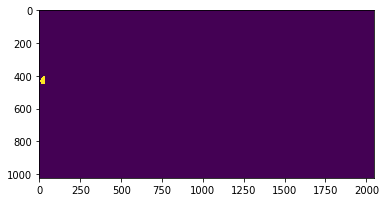

In [40]:
plt.imshow(gray_img[91])

In [26]:
json_file=[f for f in glob.glob(test_mask_dir_path + "**/*.json", recursive=True)]
print("number of json file :::",len(json_file))

number of json file ::: 500


In [42]:
json_file.sort()
json_file[132]

'/home/jupyter/dataset/mask/val/frankfurt/frankfurt_000001_032556_gtFine_polygons.json'

In [28]:
json_array=[]
for i in json_file:
        json_array.append(json.load(open(i)))

In [30]:
new_mask_array=[]
c=0
for j in gray_img:
    for i in json_array[c]["objects"]:
        if(i['label']=='vegetation'):
            temp1=cv2.fillPoly(j,[np.asarray(i["polygon"],dtype=np.int32)],255)
        else:
            temp1=cv2.fillPoly(j,[np.asarray(i["polygon"],dtype=np.int32)],0)
    temp1[temp1!=255]=0
    new_mask_array.append(temp1)
    c=c+1

In [31]:
new_mask_array=np.array(new_mask_array)
#new_mask_array=np.reshape(new_mask_array,(new_mask_array.shape[0],new_mask_array.shape[1],new_mask_array.shape[2],1))

In [32]:
mask_final_arr=[]
for image in new_mask_array:
    mask_final_arr.append(resize(image,(512,512),preserve_range=True))

In [33]:
mask_final_arr=np.array(mask_final_arr)

In [34]:
mask_final_arr.shape

(500, 512, 512)

In [35]:
np.save('test_real_mask.npy',mask_final_arr)

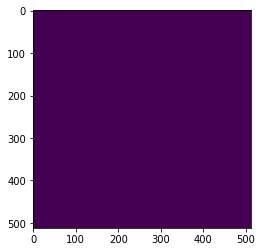

In [37]:
plt.imshow()

In [20]:
# son test 
new_mask_array=[]
temp1=[]
for i in json_array[466]["objects"]:
    if(i['label']=='vegetation'):
        temp1=cv2.fillPoly(gray_arr,[np.asarray(i["polygon"],dtype=np.int32)],255)
temp1[temp1!=255]=0
new_mask_array.append(temp1)

IndexError: list assignment index out of range

In [9]:
mask_arr=imageio.imread(mask_files[466])
gray_arr=cv2.cvtColor(mask_arr, cv2.COLOR_BGR2GRAY)

In [10]:
gray_arr=np.array(gray_arr)

In [12]:
gray_arr.shape

(1024, 2048)